This section focuses on plots designed to understand the relationship between two or more variables, primarily numerical ones. We'll look at scatter plots, line plots, and how `Seaborn` integrates linear regression models into visualizations.

## Seaborn: Visualizing Relationships


This document covers functions for visualizing relationships:

* **`sns.scatterplot`** (Axes-level): For showing the relationship between two numerical variables, with options to map other variables to color (`hue`), size (`size`), and marker style (`style`).
* **`sns.lineplot`** (Axes-level): For visualizing trends, especially over time. It automatically aggregates data and displays confidence intervals. Also supports `hue` and `style`.
* **`sns.relplot`** (Figure-level): A unified interface to create scatter and line plots on a `FacetGrid`, allowing easy faceting (creating subplots based on other variables using `col` and `row`).
* **`sns.regplot`** (Axes-level): Creates a scatter plot and fits/draws a linear regression model with a confidence interval band.
* **`sns.lmplot`** (Figure-level): Similar to `regplot` but built on `FacetGrid`, making it easy to fit and visualize separate regression models across different subsets of the data (using `hue`, `col`, `row`).

---

These plots are crucial for exploring how different variables interact within your dataset.

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the 'tips' dataset
tips_df = sns.load_dataset("tips")
# Load the 'fmri' dataset for line plot examples
fmri_df = sns.load_dataset("fmri")

In [3]:
# --- Basic Inspection ---
print("--- 'tips' Dataset Head ---")
print(tips_df.head())
print("\n--- 'fmri' Dataset Head ---")
print(fmri_df.head())
print("-" * 30)

--- 'tips' Dataset Head ---
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

--- 'fmri' Dataset Head ---
  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
------------------------------


In [4]:
# Set a consistent theme
sns.set_theme(style="whitegrid")

# --- 1. Scatter Plots (sns.scatterplot - Axes-level) ---
# Shows the relationship between two numerical variables.
# Can use hue, size, and style to represent additional variables.
print("--- 1. Scatter Plots (scatterplot) ---")

--- 1. Scatter Plots (scatterplot) ---


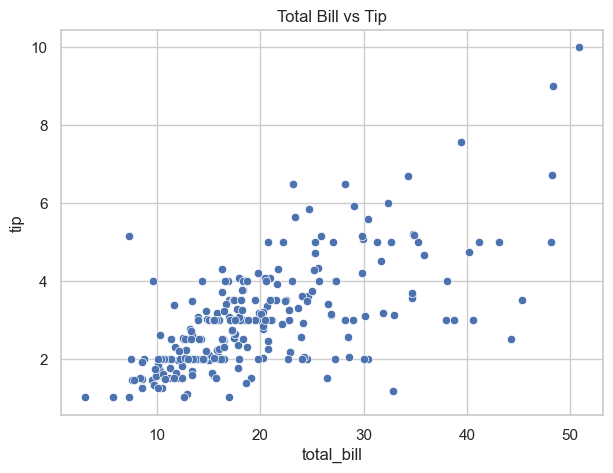

Generated basic scatter plot.


In [5]:
# a) Basic scatter plot
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=tips_df, x="total_bill", y="tip", ax=ax)
ax.set_title('Total Bill vs Tip')
plt.show()
print("Generated basic scatter plot.")

Text(0.5, 1.0, 'Bill vs Tip (Mapped by Smoker, Time, Size)')

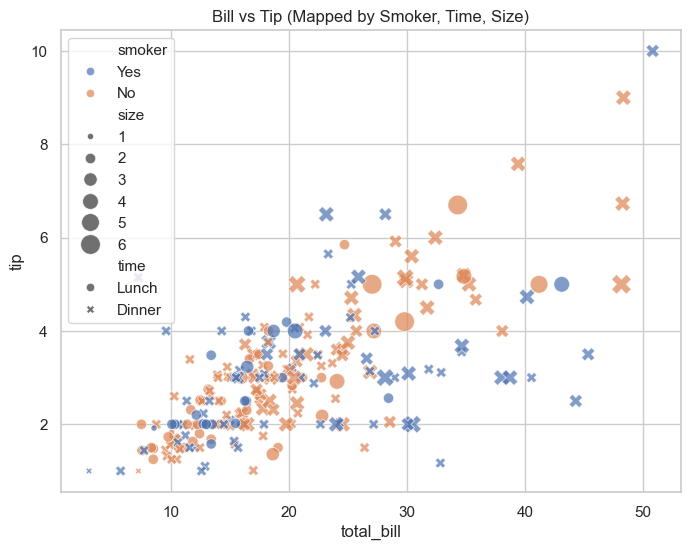

In [6]:
# b) Scatter plot with semantic mapping (hue, size, style)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=tips_df,
                x="total_bill",
                y="tip",
                hue="smoker",    # Color points by smoker status
                style="time",    # Change marker style by time of day
                size="size",     # Change point size by table size
                sizes=(20, 200), # Range of point sizes
                alpha=0.7,       # Transparency
                ax=ax)
ax.set_title('Bill vs Tip (Mapped by Smoker, Time, Size)')

In [8]:
# Improve legend placement
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
# plt.show()
# print("Generated scatter plot with hue, style, and size mapping.")
# print("-" * 20)

#### 2. Line Plots (sns.lineplot - Axes-level)
- Shows trends, often over time or another continuous variable.
- Automatically aggregates multiple measurements per x-value (default: mean)
- and shows confidence intervals (default: 95% CI bootstrap).

--- 2. Line Plots (lineplot) ---


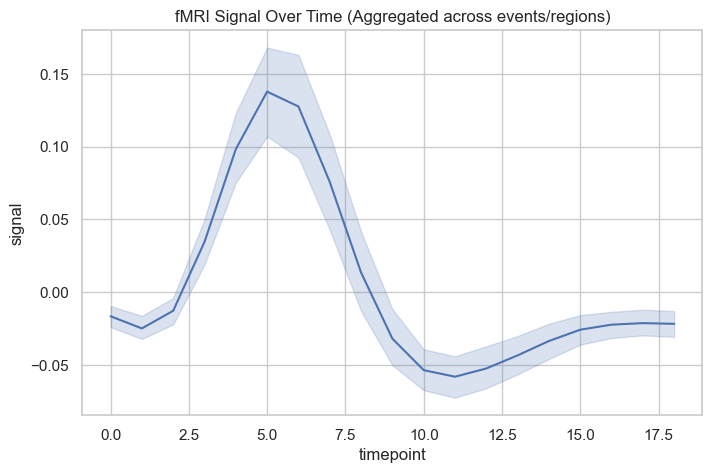

Generated basic line plot (with aggregation and CI).


In [9]:
print("--- 2. Line Plots (lineplot) ---")

# a) Basic line plot (using fmri dataset)
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=fmri_df, x="timepoint", y="signal", ax=ax)
ax.set_title('fMRI Signal Over Time (Aggregated across events/regions)')
plt.show()
print("Generated basic line plot (with aggregation and CI).")

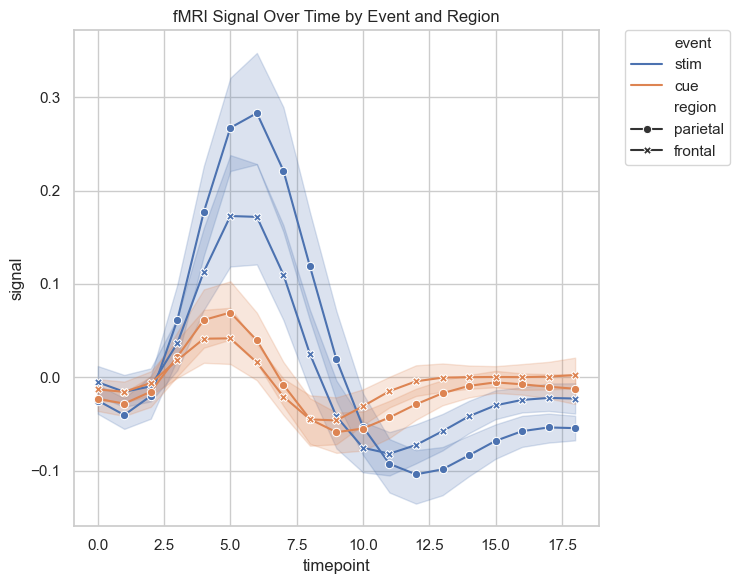

Generated line plot with hue and style mapping.
--------------------


In [10]:
# b) Line plot with semantic mapping (hue, style)
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=fmri_df,
             x="timepoint",
             y="signal",
             hue="event",   # Color lines by event type
             style="region", # Change line style by region
             markers=True,  # Add markers
             dashes=False,  # Use solid lines for different styles if desired
             err_style="band", # Show CI as a band ('band' or 'bars')
             ax=ax)
ax.set_title('fMRI Signal Over Time by Event and Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
print("Generated line plot with hue and style mapping.")
print("-" * 20)

#### 3. Relational Plots (sns.relplot - Figure-level)
- Unified interface for scatterplot and lineplot combined with FacetGrid.
- Creates its own figure, good for faceting relationships.

--- 3. Relational Plots (relplot) ---


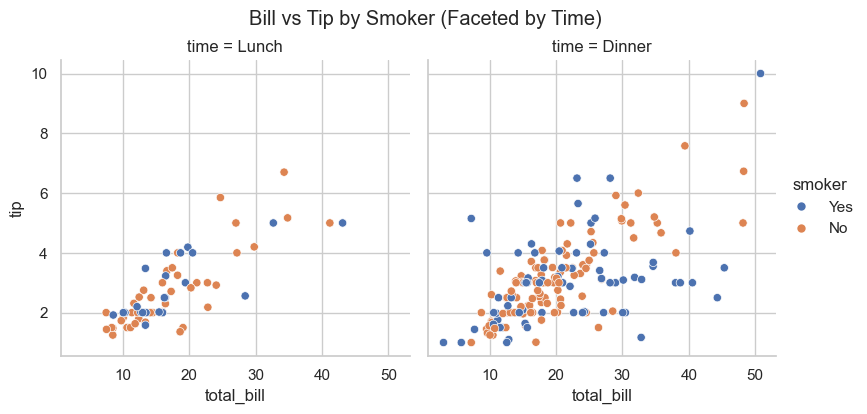

Generated faceted scatter plot using relplot.


In [11]:
print("--- 3. Relational Plots (relplot) ---")

# a) Scatter plot using relplot, faceted by 'time'
# Creates separate plots for 'Lunch' and 'Dinner' in columns
sns.relplot(data=tips_df,
            x="total_bill",
            y="tip",
            hue="smoker",
            col="time",      # Create columns based on 'time'
            kind="scatter",  # Explicitly set kind='scatter' (default)
            height=4, aspect=1) # Control subplot size/aspect ratio
plt.suptitle('Bill vs Tip by Smoker (Faceted by Time)', y=1.03)
plt.show()
print("Generated faceted scatter plot using relplot.")

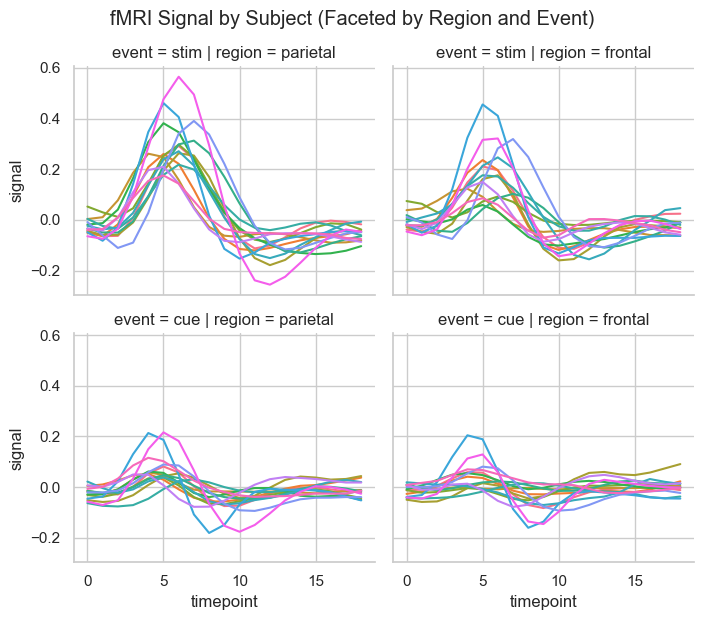

Generated faceted line plot using relplot.
--------------------


In [12]:
# b) Line plot using relplot, faceted by 'region' and 'event'
sns.relplot(data=fmri_df,
            x="timepoint",
            y="signal",
            hue="subject",   # Color by subject (many lines, maybe too noisy)
            col="region",    # Facet columns by region
            row="event",     # Facet rows by event
            kind="line",     # Explicitly set kind='line'
            height=3, aspect=1.2,
            legend=None)     # Turn off legend due to many subjects
plt.suptitle('fMRI Signal by Subject (Faceted by Region and Event)', y=1.03)
plt.show()
print("Generated faceted line plot using relplot.")
print("-" * 20)

4. Regression Plots (sns.regplot - Axes-level)
- Scatter plot with a linear regression model fit and confidence interval.

--- 4. Regression Plots (regplot) ---


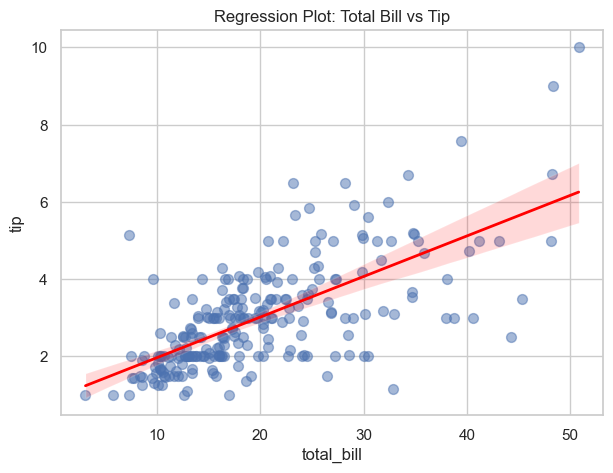

Generated regression plot using regplot.
--------------------


In [13]:
print("--- 4. Regression Plots (regplot) ---")
fig, ax = plt.subplots(figsize=(7, 5))
sns.regplot(data=tips_df, x="total_bill", y="tip", ax=ax,
            scatter_kws={'alpha':0.5, 's':50}, # Customize scatter points
            line_kws={'color':'red', 'linewidth':2}) # Customize regression line
ax.set_title('Regression Plot: Total Bill vs Tip')
plt.show()
print("Generated regression plot using regplot.")
print("-" * 20)

#### 5. Linear Model Plots (sns.lmplot - Figure-level)
- Combines regplot with FacetGrid. More powerful for conditioning models.

--- 5. Linear Model Plots (lmplot) ---


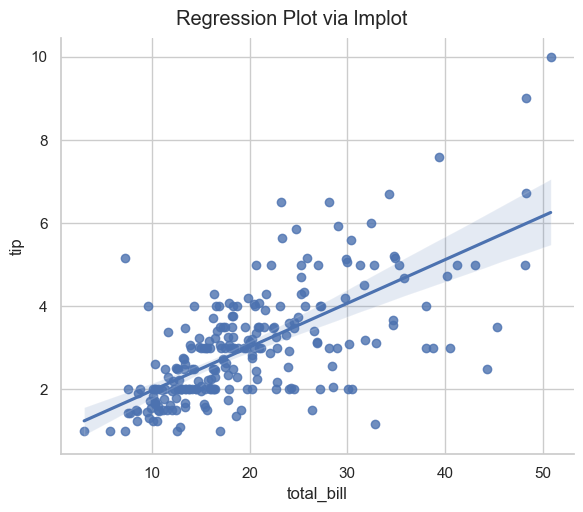

Generated basic regression plot using lmplot.


In [14]:
print("--- 5. Linear Model Plots (lmplot) ---")

# a) Basic lmplot (similar result to regplot but figure-level)
sns.lmplot(data=tips_df, x="total_bill", y="tip", height=5, aspect=1.2)
plt.suptitle('Regression Plot via lmplot', y=1.02)
plt.show()
print("Generated basic regression plot using lmplot.")

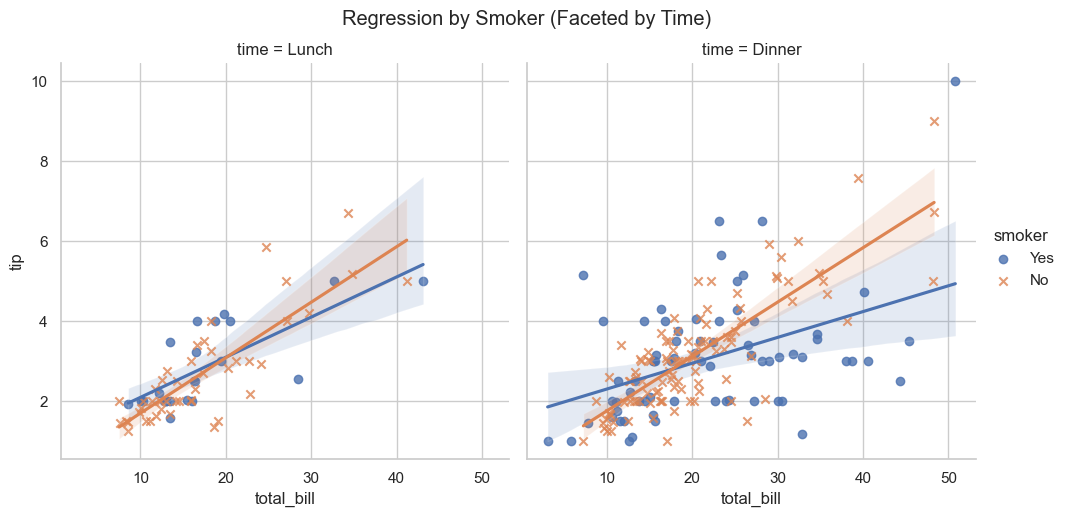

Generated faceted regression plot using lmplot.
------------------------------


In [15]:
# b) lmplot faceted by 'smoker' status (different regression for each)
sns.lmplot(data=tips_df, x="total_bill", y="tip",
           hue="smoker",    # Color points and fit separate models by smoker
           col="time",      # Facet columns by time
           markers=["o", "x"], # Different markers for hue levels
           height=5)
plt.suptitle('Regression by Smoker (Faceted by Time)', y=1.03)
plt.show()
print("Generated faceted regression plot using lmplot.")
print("-" * 30)